In [149]:
%matplotlib inline

In [163]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

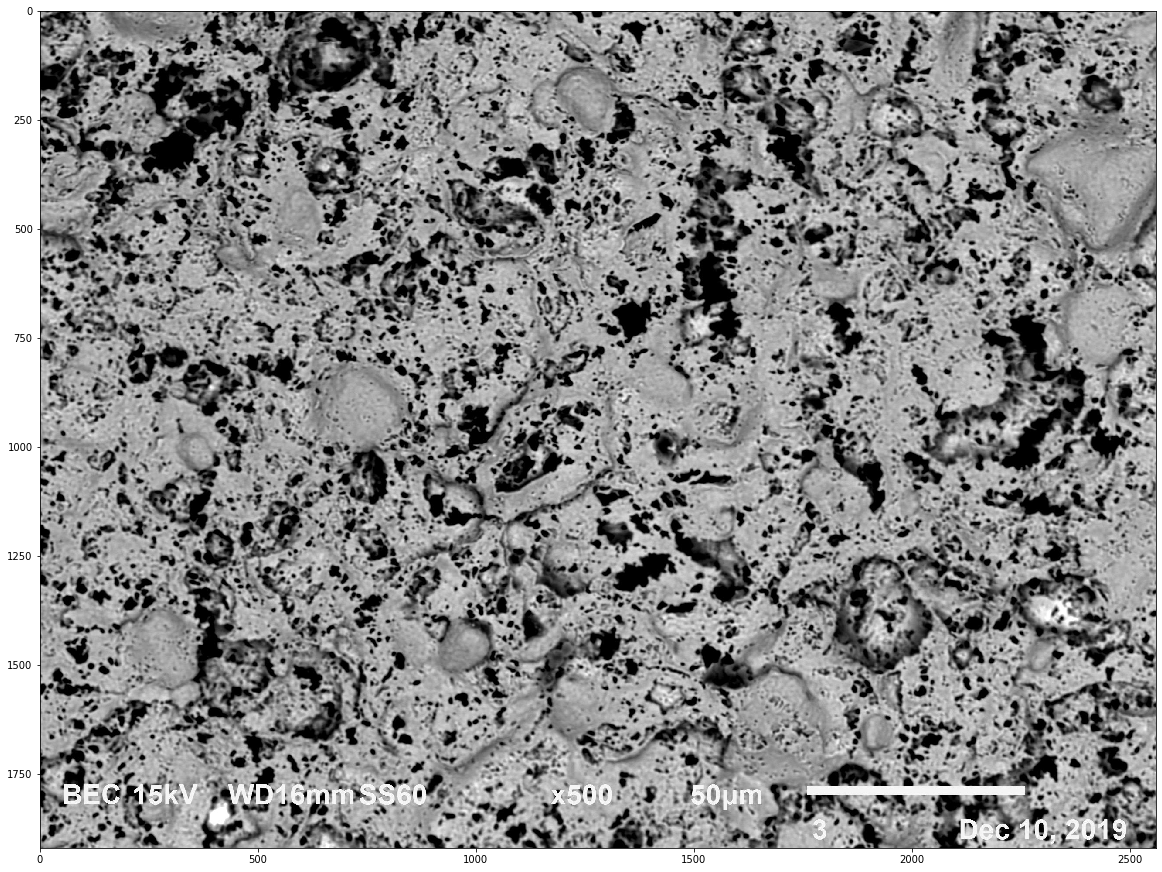

In [164]:
plt.rcParams['figure.figsize'] = [20, 20] #figure size
imgb = cv2.imread("19_12_10/12-10-YSZ-30Gr-60p-0003-x500.jpg",0)
plt.imshow(imgb,'gray')

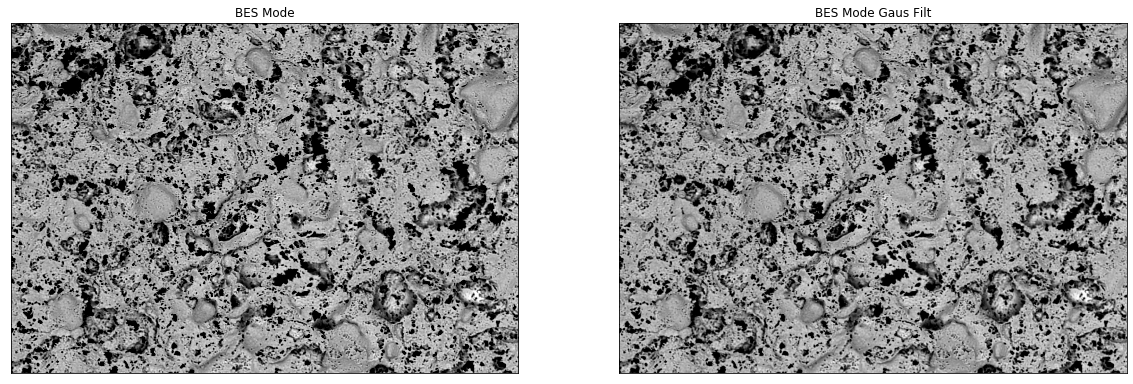

In [165]:
micron_bar_height_bes = 150 # 150 px removes the image details for SEAM's SEM in BEC mode
imgb_crop = imgb[:-micron_bar_height_bes]
imgb_blur = cv2.GaussianBlur(imgb_crop,(5,5),0)
titles = ['BES Mode', 'BES Mode Gaus Filt'] #image titles
images = [imgb_crop, imgb_blur] #image data

#plot the images
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

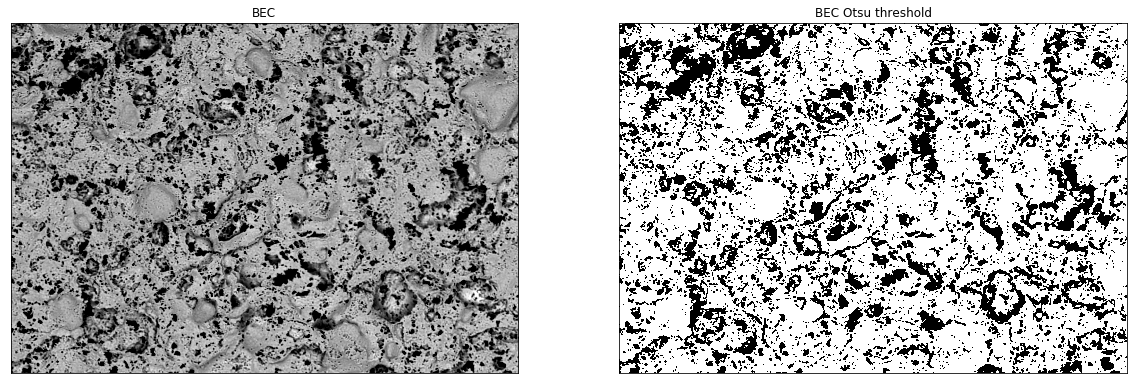

In [176]:
ret1,imgb_th = cv2.threshold(imgb_blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

titles = ['BEC','BEC Otsu threshold'] #image titles

images = [imgb_crop,imgb_th] #image data

#plot the images
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

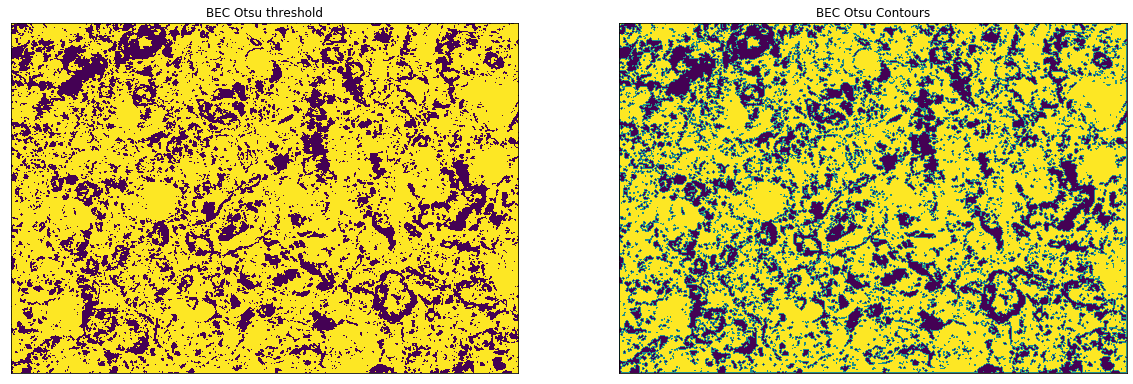

In [177]:
con_1 = imgb_th.copy()

contours, hierarchy = cv2.findContours(con_1,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)

dst_1 = cv2.drawContours(imgb_th, contours, -1, (128,255,0), 3)

titles = ['BEC Otsu threshold','BEC Otsu Contours'] #image titles

images = [con_1, dst_1] #image data

#plot the images
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i])
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


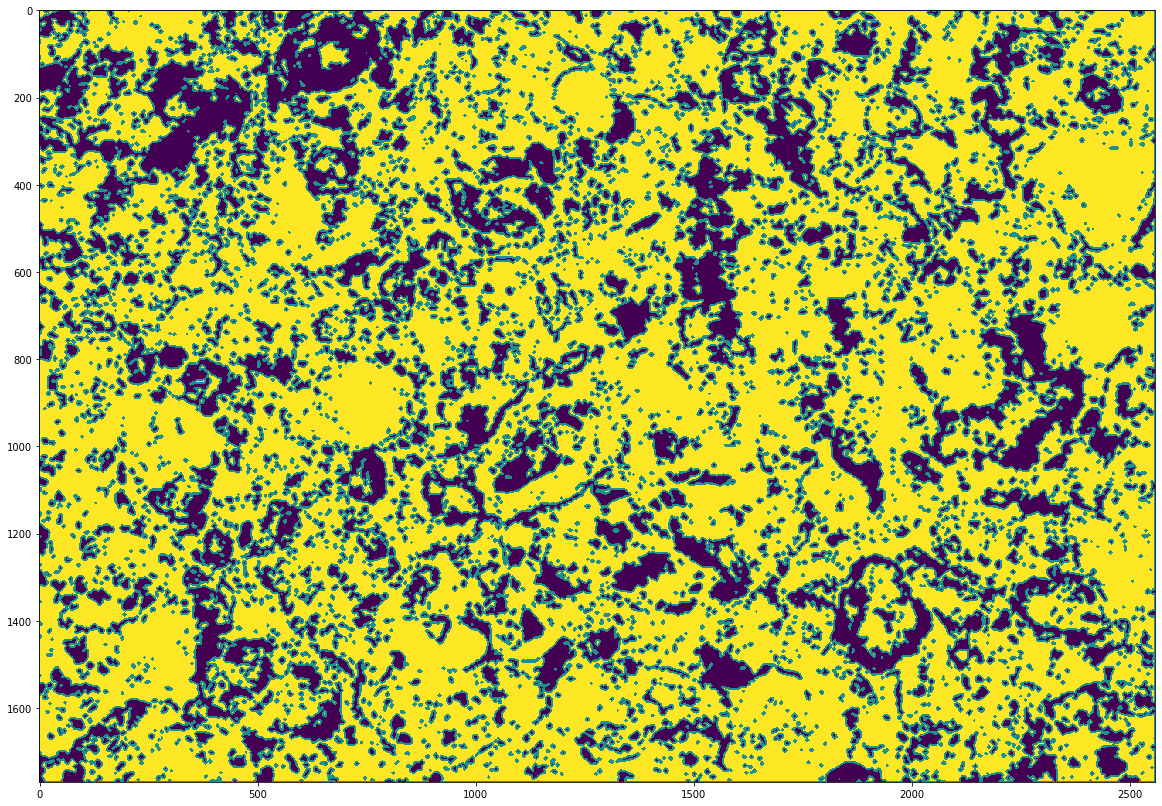

In [178]:
plt.imshow(dst_1)

In [181]:
print(cv2.moments(contours[0])) #This provides the moments and m00 represents the area

{'m00': 26.0, 'm10': 48901.33333333333, 'm01': 45950.0, 'm20': 91974744.66666666, 'm11': 86423711.33333333, 'm02': 81207819.33333333, 'm30': 172988414654.6, 'm21': 162547706783.06665, 'm12': 152737363400.53333, 'm03': 143519312893.2, 'mu20': 113.82905983924866, 'mu11': 8.769230768084526, 'mu02': 30.87179486453533, 'mu30': 40.04290771484375, 'mu21': 48.932516556524206, 'mu12': 1.1197864000641857, 'mu03': -10.05438232421875, 'nu20': 0.16838618319415483, 'nu11': 0.012972234864030366, 'nu02': 0.04566833559842505, 'nu30': 0.01161695310758895, 'nu21': 0.014195940872264393, 'nu12': 0.00032486417301906583, 'nu03': -0.0029169032583246353}
